# Import

In [6]:
# Python
import numpy as np
import pandas as pd
import time
from IPython.display import Image

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# RDKit
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint
from rdkit.Chem.Draw import rdMolDraw2D

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [3]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))
def get_index_of_array_that_contain_1_in_any_position(list1):
    result = []
    for i, e in enumerate(list1):
        if e > 0:
            result.append(i)
    return result

In [63]:
def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)
def show_images(imgs,buffer=5):
    height = 0
    width = 0
    for img in imgs:
        height = max(height,img.height)
        width += img.width
    width += buffer*(len(imgs)-1)
    res = Image.new("RGBA",(width,height))
    x = 0
    for img in imgs:
        res.paste(img,(x,0))
        x += img.width + buffer
    return res
from io import BytesIO

# Example 1 : Show SMILE to IMG

In [4]:
mol1 = Chem.MolFromSmiles('CCC#C')
mol2 = Chem.MolFromSmiles('CC#CC')

mol3 = Chem.MolFromSmiles('C(O)CCCC')
mol4 = Chem.MolFromSmiles('CC(O)CCC')


## CCC#C CC#CC

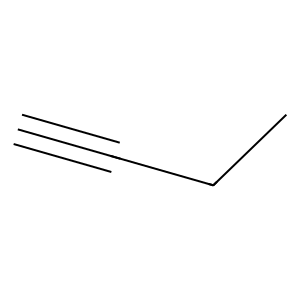

In [10]:
img1 = Draw.MolToImage(mol1)
img2 = Draw.MolToImage(mol2)
img1

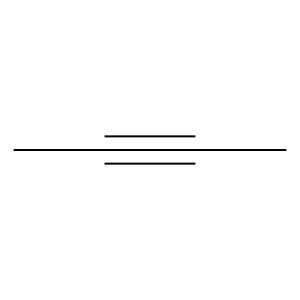

In [11]:
img2

## C(O)CCCC CC(O)CCC

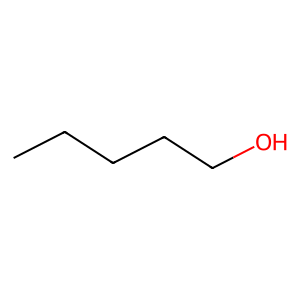

In [12]:
img1 = Draw.MolToImage(mol3)
img2 = Draw.MolToImage(mol4)
img1

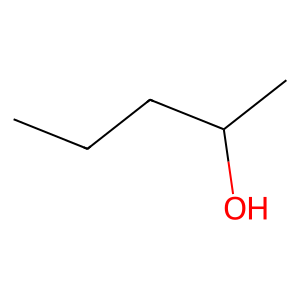

In [13]:
img2

# Example 2 : Explain Concept of Fingerprint

In [45]:
mol1 = Chem.MolFromSmiles('CCC#C')
mol2 = Chem.MolFromSmiles('CC#CC')
bit_info1 = {}
bit_info2 = {}
fp1 = GetHashedMorganFingerprint(mol1, 3,  nBits=70, bitInfo=bit_info1, useFeatures=True)
fp2 = GetHashedMorganFingerprint(mol2, 3,  nBits=70, bitInfo=bit_info2, useFeatures=True)

In [46]:
count_bit_info_mol1=[]
count_bit_info_mol2=[]
for i in bit_info1:
    count_bit_info_mol1.append([i, len(bit_info1[i])])
for i in bit_info2:
    count_bit_info_mol2.append([i, len(bit_info2[i])])

df1 = pd.DataFrame(count_bit_info_mol1)
df1 = df1.set_index(0)
df1.rename_axis('Bit Index', inplace=True)
df1 = df1.rename(columns={1: 'Number in Bit'})

df2 = pd.DataFrame(count_bit_info_mol2)
df2 = df2.set_index(0)
df2.rename_axis('Bit Index', inplace=True)
df2 = df2.rename(columns={1: 'Number in Bit'})

##  Fingerprint C#CCC

In [47]:
df1

,Number in Bit
Bit Index,
0,4
9,1
31,1
48,1
60,1
69,1


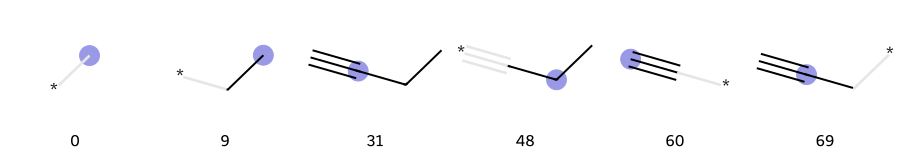

In [48]:
# Inspect Bit
mol = mol1
bit_info_mol_1 = {}
fp_mol = GetHashedMorganFingerprint(mol1, 3, nBits=70, bitInfo=bit_info_mol_1, useFeatures=True)
all_fragments = [(mol1, x, bit_info_mol_1) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img1=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])
img1

##  Fingerprint CC#CC

In [49]:
df2

,Number in Bit
Bit Index,
0,4
9,2
33,1
69,2


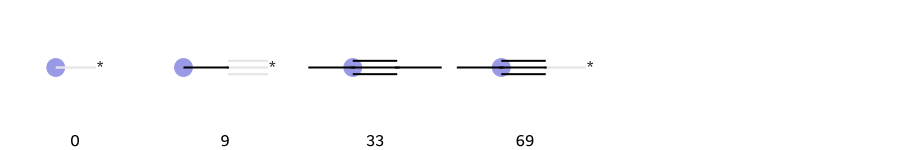

In [50]:
# Inspect Bit
mol = mol2
bit_info_mol_2 = {}
fp_mol = GetHashedMorganFingerprint(mol2, 3, nBits=70, bitInfo=bit_info_mol_2, useFeatures=True)
all_fragments = [(mol2, x, bit_info_mol_2) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img1=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])
img1

# Example 3 : Morgan Fingerprint Step

## Whole Molucule

In [120]:
mol1 = Chem.MolFromSmiles('CCCC(=O)N')

In [121]:
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.drawOptions().addAtomIndices = True
d.drawOptions().useBWAtomPalette()
d.DrawMolecule(mol1)
d.FinishDrawing()

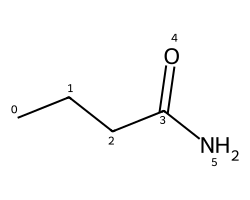

In [122]:
namepic = "EX3-pic1.png"
d.WriteDrawingText(namepic)
Image(filename=namepic) 

## r = 0

In [135]:
#smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
#mol.GetAtomWithIdx(3).SetProp("_displayLabel","R<sub>1</sub>")
#mol.GetAtomWithIdx(7).SetProp("_displayLabel","R<sub>2</sub>")

smi = '*C* |$A;;A;$|'
mol1 = Chem.MolFromSmiles(smi)

In [136]:
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.drawOptions().setAtomPalette({0:(0.502, 0.502, 0.502)})
d.DrawMolecule(mol1)
d.FinishDrawing()

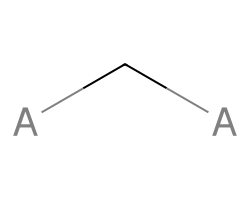

In [137]:
namepic = "EX3-pic2.png"
d.WriteDrawingText(namepic)
Image(filename=namepic) 

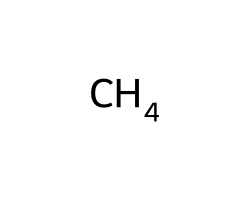

In [143]:
smi = 'C '
mol1 = Chem.MolFromSmiles(smi)
mol1 = Chem.RemoveHs(mol1)

d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.drawOptions().setAtomPalette({0:(0.502, 0.502, 0.502)})
d.DrawMolecule(mol1)
d.FinishDrawing()

namepic = "EX3-pic2.5.png"
d.WriteDrawingText(namepic)
Image(filename=namepic) 

## r = 1

In [138]:
smi2 = '*CCC(=*)* |$A;;;;A;A;$|'
mol2 = Chem.MolFromSmiles(smi2)

In [139]:
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.drawOptions().setAtomPalette({0:(0.502, 0.502, 0.502)})
d.DrawMolecule(mol2)
d.FinishDrawing()

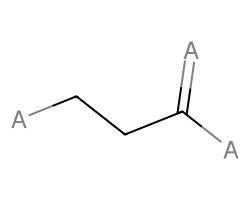

In [140]:
namepic = "EX3-pic3.png"
d.WriteDrawingText(namepic)
Image(filename=namepic) 

In [147]:
smi2 = 'CCC'
mol2 = Chem.MolFromSmiles(smi2)

In [148]:
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.drawOptions().setAtomPalette({0:(0.502, 0.502, 0.502)})
d.DrawMolecule(mol2)
d.FinishDrawing()

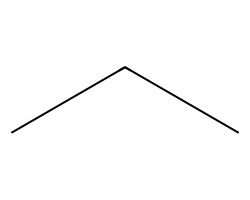

In [149]:
namepic = "EX3-pic3.5.png"
d.WriteDrawingText(namepic)
Image(filename=namepic) 

## r = 2

In [129]:
smi2 = 'CCCC(=O)N |$;;;;;;;;$|'
mol2 = Chem.MolFromSmiles(smi2)

In [130]:
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.drawOptions().setAtomPalette({0:(0.502, 0.502, 0.502)})
d.DrawMolecule(mol2)
d.FinishDrawing()

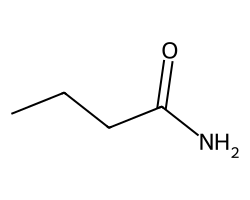

In [131]:
namepic = "EX3-pic4.png"
d.WriteDrawingText(namepic)
Image(filename=namepic) 

##  Fingerprint CCCC(=O)N

In [150]:
mol1 = Chem.MolFromSmiles('CCCC(=O)N')
bit_info1 = {}
fp1 = GetHashedMorganFingerprint(mol1, 3,  nBits=70, bitInfo=bit_info1, useFeatures=True)

In [151]:
count_bit_info_mol1=[]
for i in bit_info1:
    count_bit_info_mol1.append([i, len(bit_info1[i])])

df1 = pd.DataFrame(count_bit_info_mol1)
df1 = df1.set_index(0)
df1.rename_axis('Bit Index', inplace=True)
df1 = df1.rename(columns={1: 'Number in Bit'})

In [152]:
df1

,Number in Bit
Bit Index,
0,4
1,1
2,1
4,1
5,1
9,1
13,1
37,1
44,1


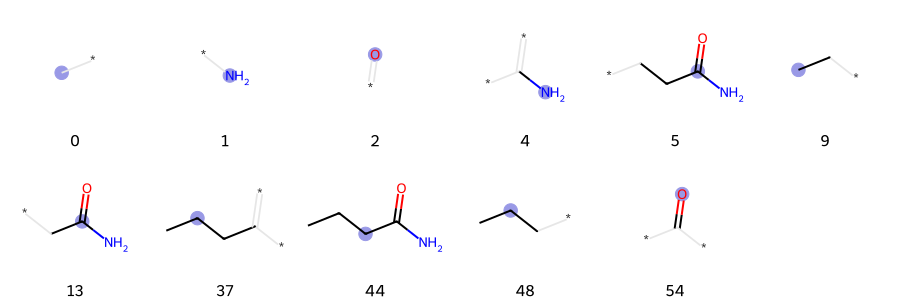

In [155]:
# Inspect Bit
mol = mol1
bit_info_mol_1 = {}
fp_mol = GetHashedMorganFingerprint(mol1, 3, nBits=70, bitInfo=bit_info_mol_1, useFeatures=True)
all_fragments = [(mol1, x, bit_info_mol_1) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img1=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])
img1

# Example 3 : Coompare B-MF and C-MF

In [21]:
mol1 = Chem.MolFromSmiles('CCC#C')
bit_info1 = {}
bit_info2 = {}
fp1 = GetHashedMorganFingerprint(mol1, 3,  nBits=16, bitInfo=bit_info1, useFeatures=True)
fp2 = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol1, radius=3,  nBits=16, bitInfo=bit_info2, useFeatures=True)

In [22]:
count_bit_info_mol1=[]
count_bit_info_mol2=[]
for i in bit_info1:
    count_bit_info_mol1.append([i, len(bit_info1[i])])
for i in bit_info2:
    count_bit_info_mol2.append([i, len(bit_info2[i])])

df1 = pd.DataFrame(count_bit_info_mol1)
df1 = df1.set_index(0)
df1.rename_axis('Bit Index', inplace=True)
df1 = df1.rename(columns={1: 'Number in Bit'})

df2 = pd.DataFrame(count_bit_info_mol2)
df2 = df2.set_index(0)
df2.rename_axis('Bit Index', inplace=True)
df2 = df2.rename(columns={1: 'Number in Bit'})

In [36]:
df1

,Number in Bit
Bit Index,
0,4
1,2
2,1
8,1
13,1


In [24]:
df2

,Number in Bit
Bit Index,
0,4
1,2
2,1
8,1
13,1


In [25]:
np.array(fp1)

array(<rdkit.DataStructs.cDataStructs.UIntSparseIntVect object at 0x000001568A3B2030>,
      dtype=object)

In [26]:
np.array(fp2)

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [27]:
fp1

In [28]:
import numpy as np
from rdkit import DataStructs

# Create a UIntSparseIntVect object
fp = DataStructs.UIntSparseIntVect(1024)

# Convert the UIntSparseIntVect object to a NumPy array
array = np.zeros((0,), dtype=np.int8)
DataStructs.ConvertToNumpyArray(fp1, array)

In [29]:
array

array([4, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int8)

In [30]:
import numpy as np
from rdkit import DataStructs

# Create a UIntSparseIntVect object
fp = DataStructs.UIntSparseIntVect(1024)

# Convert the UIntSparseIntVect object to a NumPy array
array = np.zeros((0,), dtype=np.int8)
DataStructs.ConvertToNumpyArray(fp2, array)

In [31]:
array

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int8)

# Test Function

In [68]:
mean_absolute_percentage_error([340,350],[350,360])

0.028991596638655463

In [67]:
(abs(340-350)/340+abs(350-360)/350)/2

0.028991596638655463

0.02857142857142857

In [49]:
mean_absolute_percentage_error([2],[5])

1.5

In [50]:
abs(2-5)/2

1.5

In [23]:
smi2 = '*CCC(=*)*'
mol2 = Chem.MolFromSmiles(smi2)
d2 = rdMolDraw2D.MolDraw2DCairo(250, 250)
rdMolDraw2D.PrepareAndDrawMolecule(d2,mol2)
d2.WriteDrawingText("EX2-pic2.png")

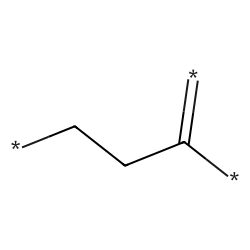

In [24]:
Image(filename='EX2-pic2.png') 